# Predicting Insurance Premiums

- Our simple dataset contains a few attributes for each person such as 
- Age, Sex, BMI, Children, Smoker, Region and their charges

## Aim
- To use this info to predict charges for new customers

In [1]:
import pandas as pd


file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
insurance = pd.read_csv(file_name)

# Preview our data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance.shape

(1338, 7)

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Checking for missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#checking for unique values in each features
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


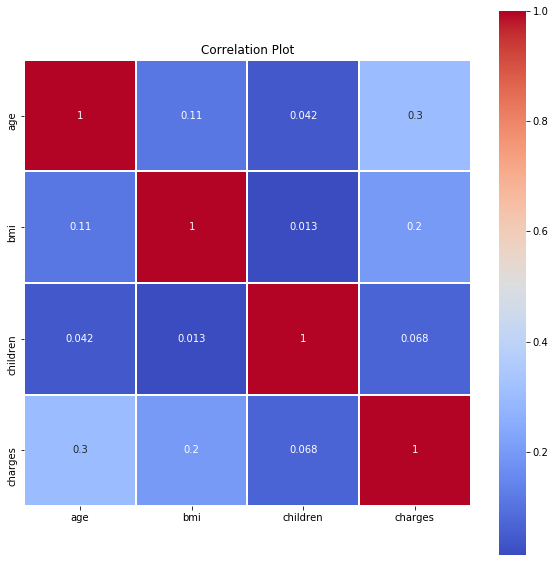

In [8]:
#Plotting correlation plot

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title('Correlation Plot')
corrplot=insurance.corr()
sns.heatmap(corrplot,annot=True,cmap='coolwarm',linewidth=1,square=True)

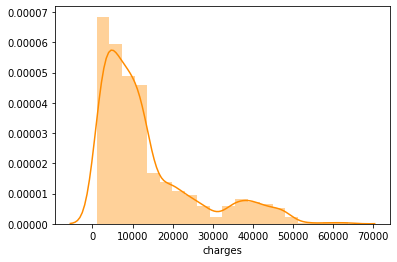

In [36]:
import seaborn as sns
sns.distplot(insurance['charges'],bins=20,color='darkorange')


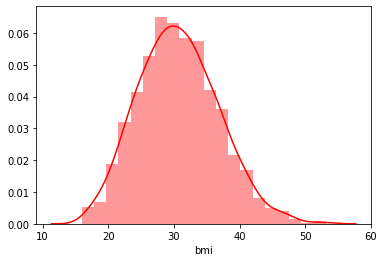

In [37]:
sns.distplot(insurance['bmi'],bins=20,color='red')

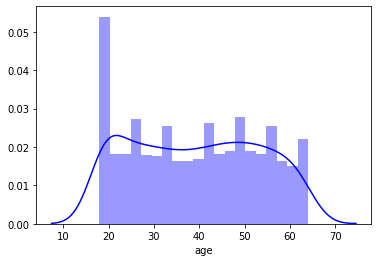

In [38]:
sns.distplot(insurance['age'],bins=20,color='blue')

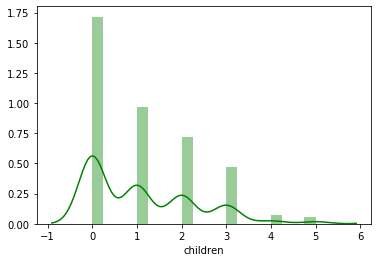

In [39]:
sns.distplot(insurance['children'],bins=20,color='green')

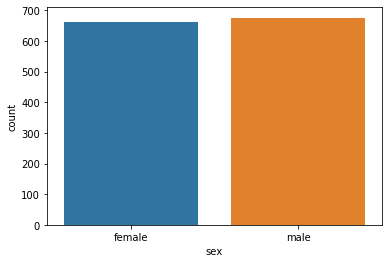

In [41]:
sns.countplot(x='sex',data=insurance)

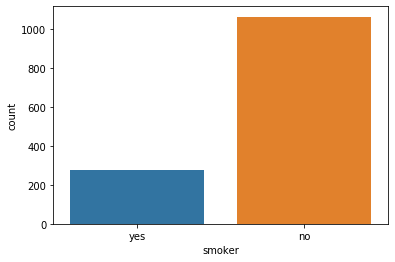

In [42]:
sns.countplot(x='smoker',data=insurance)

### Plots using Plotly and Cufflinks

In [51]:
import numpy as np
import pandas as pd
%matplotlib inline

In [45]:
from plotly import __version__

In [46]:
import cufflinks as cf

In [47]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [48]:
init_notebook_mode(connected=True)

In [49]:
cf.go_offline()

In [66]:
insurance['age'].iplot(kind='hist',bins=20)

In [69]:
#Scatter plots
#Age vs Charges

insurance.iplot(kind='scatter',x='age',y='charges',mode='markers',size=5,xTitle='Age',yTitle='Charges')

In [71]:
insurance.iplot(kind='scatter',x='bmi',y='charges',mode='markers',size=5,xTitle='BMI',yTitle='Charges',color='red')

In [72]:
insurance.iplot(kind='scatter',x='children',y='charges',mode='markers',size=5,xTitle='Children',yTitle='Charges',color='blue')

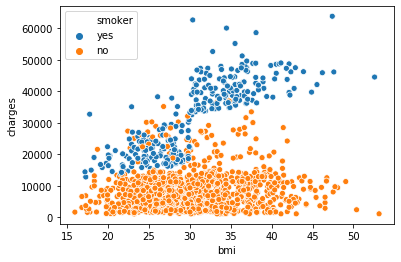

In [79]:
sns.scatterplot(x='bmi',y='charges',data=insurance,hue='smoker')

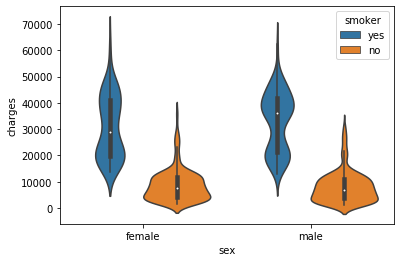

In [82]:
sns.violinplot(x='sex',y='charges',hue='smoker',data=insurance)

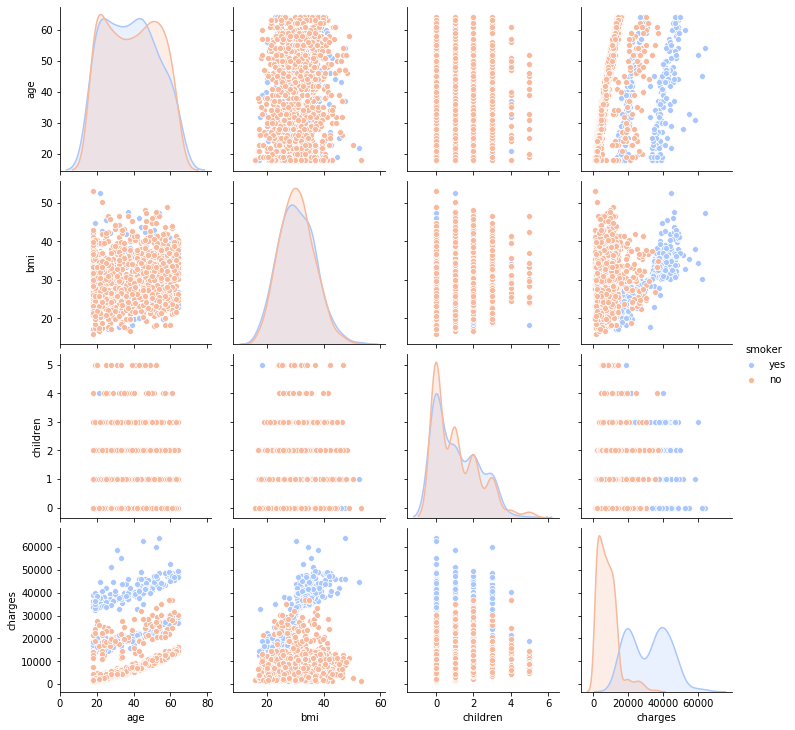

In [83]:
sns.pairplot(insurance,hue='smoker',palette='coolwarm')

### Preparing data for machine learning

In [84]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [85]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [86]:
#Performing one hot encoding on categorical Region data
insurance=pd.get_dummies(insurance,columns=['region'],drop_first=True)
insurance.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


In [87]:
#Changing binary categories to 1s and 0s
insurance['sex'] = insurance['sex'].map(lambda s:1 if s=='female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s:1 if s=='yes' else 0)

insurance.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [88]:
#Creating X and y variables

X= insurance.drop(['charges'],axis=1)
y= insurance.charges

### Modeling our Data

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [93]:
print(lr.score(X_test, y_test))

0.756602040450292


In [102]:
#Standardizing our data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [103]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,0.667857,0.997866,-0.584262,-0.908398,-0.472789,-0.57406,1.661035,-0.552666
1,-1.049293,-1.002139,-0.026754,-0.908398,-0.472789,-0.57406,-0.602034,-0.552666
2,1.097145,0.997866,0.267486,-0.090053,-0.472789,-0.57406,-0.602034,-0.552666
3,-0.691554,0.997866,2.015810,0.728292,-0.472789,-0.57406,1.661035,-0.552666
4,-0.333814,0.997866,0.563356,-0.090053,-0.472789,-0.57406,1.661035,-0.552666


In [104]:
pd.DataFrame(y_train).head()

,charges
118,8601.32930
423,2727.39510
283,11879.10405
572,4753.63680
919,5245.22690


In [105]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model
# Create a instance for Linear Regression model
multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

### Evaluating Multiple Linear Regression Model


In [110]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.46825773331552356
Testing Accuracy for Multiple Linear Regression Model:  -0.23089326546312394
RMSE for Training Data:  14238.682575179693
RMSE for Testing Data:  14269.182058172932
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7202464932307151


In [106]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

###  Evaluating Decision Tree Regression Model


In [111]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8808982664069582
Testing Accuracy for Decision Tree Regression Model:  0.855252803180815
RMSE for Training Data:  4055.344015066417
RMSE for Testing Data:  4893.21121296839
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8496944009813476


In [107]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model
# Create a instance for Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

### Evaluating Random Forest Regression Model


In [112]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8871255648417129
Testing Accuracy for Random Forest Regression Model:  0.8696126570269782
RMSE for Training Data:  3947.902830772528
RMSE for Testing Data:  4644.153855674838
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8584718989334785


In [108]:
from sklearn.svm import SVR  # Import SVR model
# Create a instance for Support Vector Regression model
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Evaluating Support Vector Regression Model

In [113]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.6746624659386159
Testing Accuracy for Support Vector Regression Model:  0.6589846711877241
RMSE for Training Data:  6702.483370762155
RMSE for Testing Data:  7510.6207350851555
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.7062801534563217


In [116]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.468258,-0.230893,14238.682575,14269.182058,0.720246
Decision Tree Regression,max_depth=5,0.880898,0.855253,4055.344015,4893.211213,0.849694
Random Forest Regression,"n_estimators=400, max_depth=5",0.887126,0.869613,3947.902831,4644.153856,0.858472
Support Vector Regression,"kernel=”linear”, C=1000",0.674662,0.658985,6702.483371,7510.620735,0.706280


In [117]:
# With 87% accuracy, it is clear that the Random forest regressor performs the best on the test data out of all the other models